[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/porterjenkins/byu-cs474/blob/master/lab6_regularization.ipynb))

# Lab 6: Regularization

Be sure and fill in all the cells marked a TODO

## Objectives

In this lab we will study the effect of regularization on training neural networks. Specifically, we will study how L2 regularization (also commonly referred to as weight decay) can improve the generalization ability of neural nets.

## Deliverable

You will turn in a completed version of notebook to Canvas/Learning Suite.  In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the instructions

## Note
For Q2 of the lab, you will want to make sure your notebook is connected to a GPU instance

## Q1) L2 Regularization
This question investigates adding L2 regularization to the loss function for the Gabor model as in figure 9.1 of Prince

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

Let's create our training data 30 pairs `{x_i, y_i}`. We'll try to fit the Gabor model to these data

In [2]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

### Part 1.a) Setting up the Gabor Model

Gabor model definition:

In [3]:
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

Let's define a function to plot the data, the model and its outputs:

In [4]:
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

Initialize the parameters:

In [5]:
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency

Draw the model:

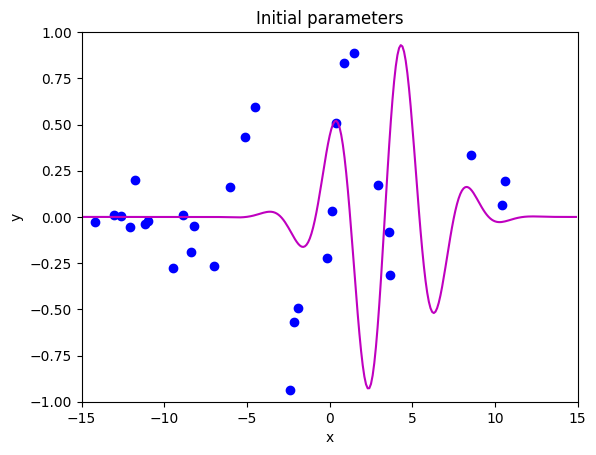

In [6]:
draw_model(data,model,phi, "Initial parameters")

Now let's compute the sum of squares loss for the training data:

**TODO:** Implement the sum of squares loss function

In [7]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi, data_x)
  # Compute the sum of squares loss
  loss = sum((pred - actual) ** 2 for pred, actual in zip(pred_y, data_y))
  return loss

Now let's plot the whole **loss function:**

In [8]:
# Define pretty colormap
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

def draw_loss_function(compute_loss, data,  model, my_colormap, phi_iters = None):

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

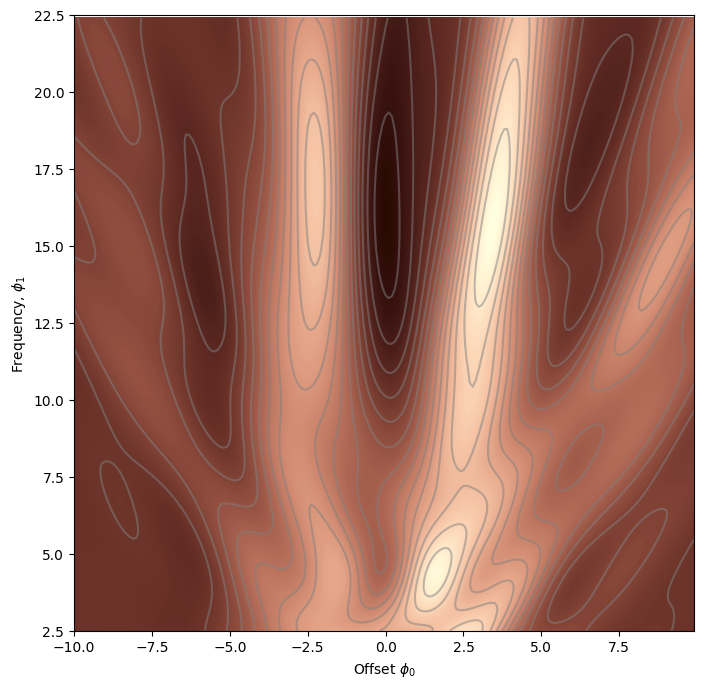

In [9]:
draw_loss_function(compute_loss, data, model, my_colormap)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

The Gabor model has two parameters, $\phi_0$ and $\phi_1$. We need to comptue the deriviate of the loss (sum of squares) with respect both quantities. Below we define two functions that each implement of the two partial deriviates we need. This is a hassle to get right!

In [10]:
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

Now, let's implement a function that puts each partial deriviate into a vector, called a gradient:

In [11]:
def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

Now we are ready to find the minimum.  For simplicity, we'll just use regular (non-stochastic) gradient descent with a fixed learning rate.

**TODO:** Implement the gradient descent updates in the function below:

In [12]:
def gradient_descent_step(phi, data):
    # Extract data_x and data_y from the data tuple
    data_x, data_y = data

    # Step 1: Compute the gradient
    gradient = compute_gradient(data_x, data_y, phi)

    # Step 2: Update the parameters
    alpha = 0.1  # learning rate
    phi = phi - alpha * gradient

    return phi

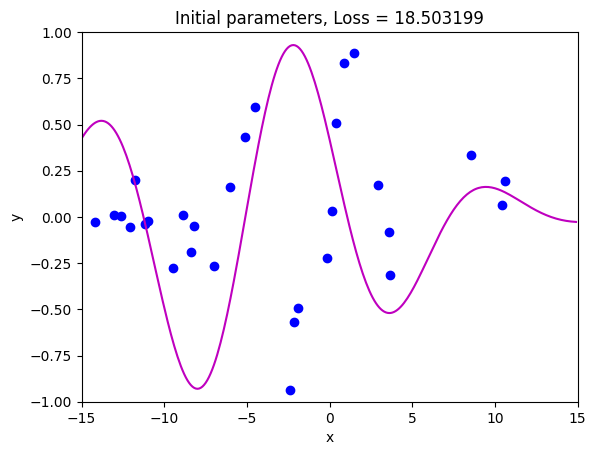

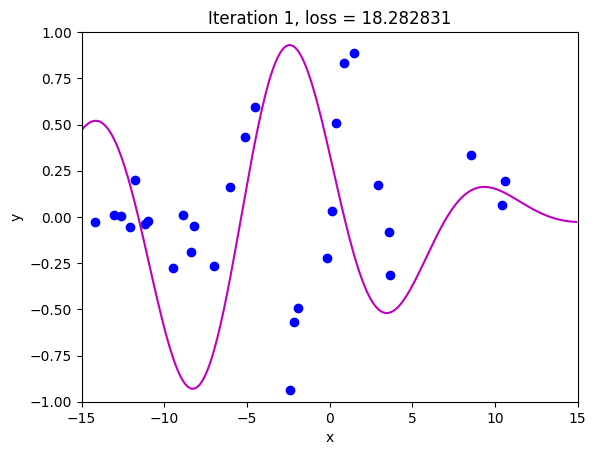

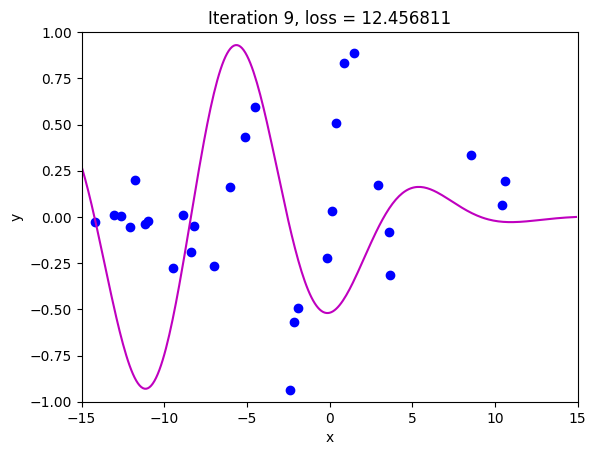

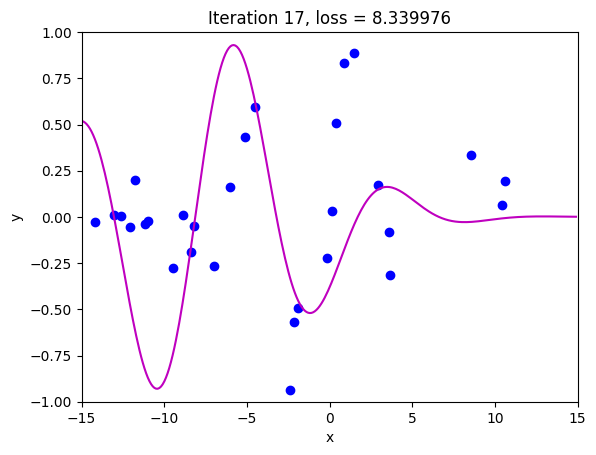

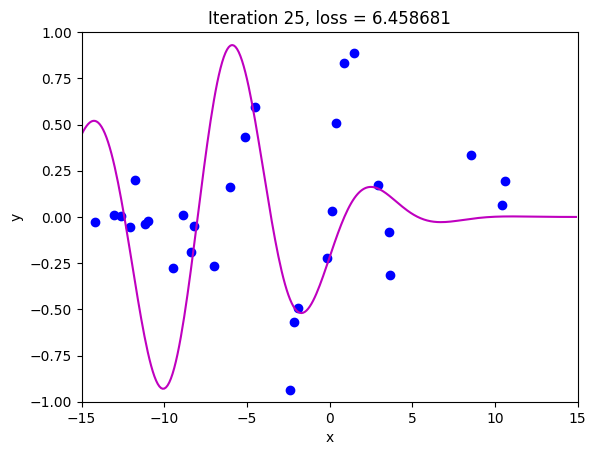

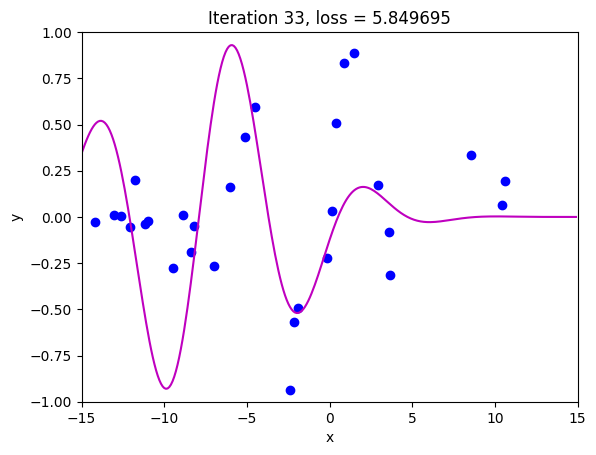

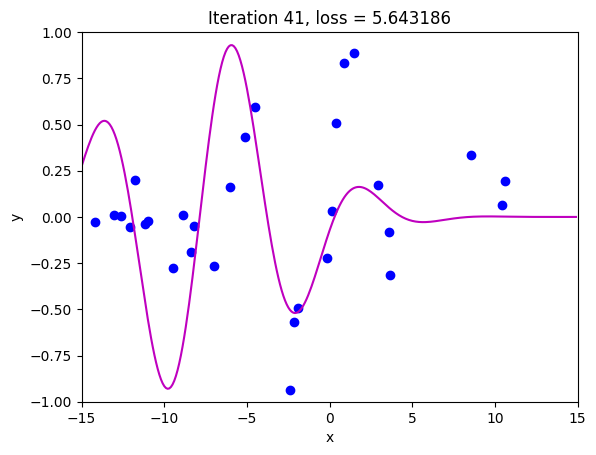

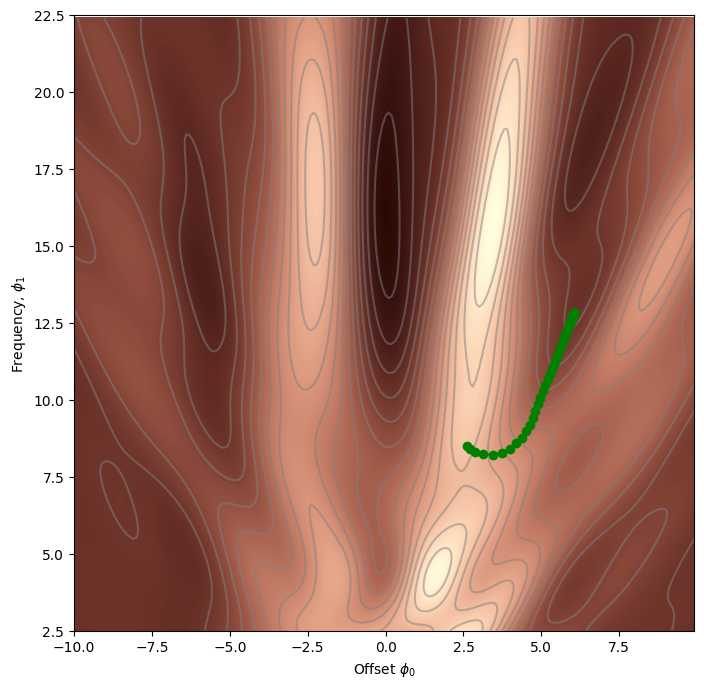

In [13]:
# Initialize the parameters
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 2.6
phi_all[1,0] = 8.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model, my_colormap, phi_all)

## Part 1.b) Applying L2 Regularization

Unfortunately, when we start from this position, the solution descends to a local minimum and the final model doesn't fit well.<br><br>

But what if we had some weak knowledge that the solution was in the vicinity of $\phi_0=0.0$, $\phi_{1} = 12.5$ (the center of the plot)?

Let's add a term to the loss function that penalizes solutions that deviate from this point.  

\begin{equation}
L'[\boldsymbol\phi] = L[\boldsymbol\phi]+ \lambda\cdot \Bigl(\phi_{0}^2+(\phi_1-12.5)^2\Bigr)
\end{equation}

where $\lambda$ controls the relative importance of the original loss and the regularization term

**TODO**: define a function that implements the L2 regularization term (term in large parentheses in the above equation)

In [14]:
# Computes the regularization term
def compute_reg_term(phi0, phi1):
    # Compute the L2 regularization term
    reg_term = phi0**2 + phi1**2
    return reg_term

**TODO**: Now define the whole loss function, which is the sum of squares plus $\lambda$ times the L2 regularizatoin term, or $L'[\phi]$ defined above

In [15]:
# Note I called the weighting lambda_ to avoid confusing it with python lambda functions
def compute_loss2(data_x, data_y, model, phi, lambda_):
    pred_y = model(phi, data_x)
    # Compute the sum of squares loss
    loss = sum((pred - actual) ** 2 for pred, actual in zip(pred_y, data_y))
    # Compute the regularization term
    reg_term = compute_reg_term(phi[0], phi[1])
    # Compute the total loss
    total_loss = loss + lambda_ * reg_term
    return total_loss

Code to draw the regularization function

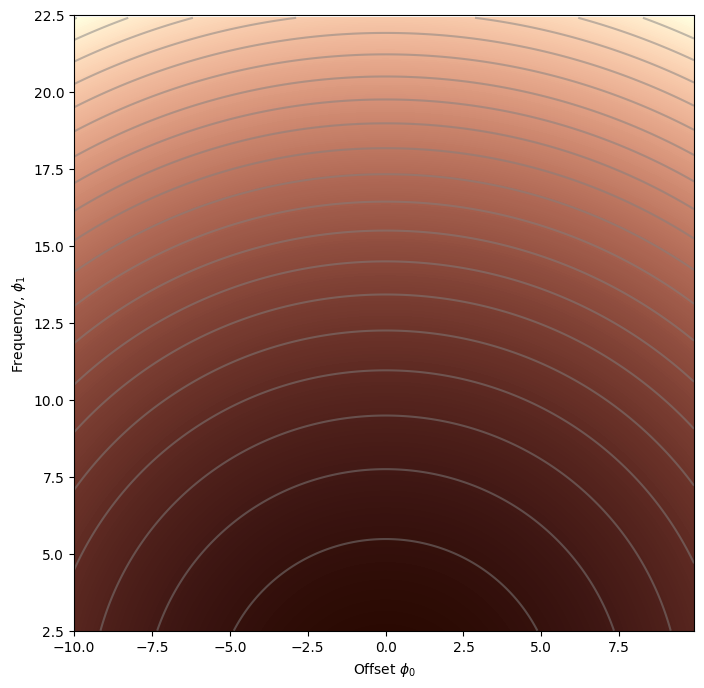

In [16]:
def draw_reg_function():

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_reg_term(offsets_mesh[idslope], slope)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

# Draw the regularization function.  It should look similar to figure 9.1b
draw_reg_function()

Code to draw loss function with regularization:

<ipython-input-17-0c24e4edaf22>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)


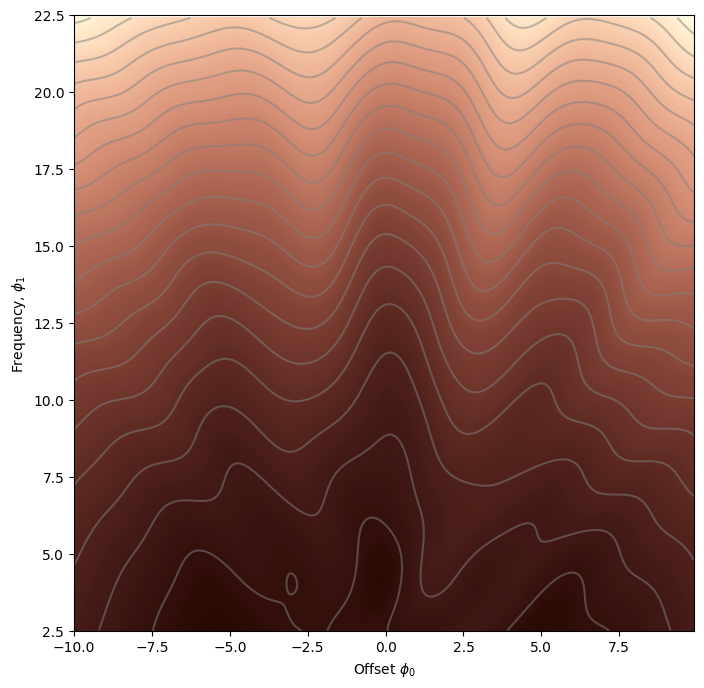

In [17]:
def draw_loss_function_reg(data,  model, lambda_, my_colormap, phi_iters = None):

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

# This should look something like figure 9.1c
draw_loss_function_reg(data, model, 0.2, my_colormap)

Now we'll compute the derivatives $\frac{\partial L'}{\partial\phi_0}$ and $\frac{\partial L'}{\partial\phi_1}$ of the regularized loss function:

\begin{equation}
L'[\boldsymbol\phi] = L[\boldsymbol\phi]+ \lambda\cdot \Bigl(\phi_{0}^2+(\phi_1-12.5)^2\Bigr)
\end{equation}

so that we can perform gradient descent.

**TODO:** Implement the partial deriviates each the regularized loss function

In [18]:
def compute_gradient2(data_x, data_y, phi, lambda_):
    # Compute the gradient of the unregularized loss
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0], phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0], phi[1])

    # Add the gradients of the regularization term
    dl_dphi0 += lambda_ * 2 * phi[0]
    dl_dphi1 += lambda_ * 2 * phi[1]

    # Return the gradient
    return np.array([dl_dphi0, dl_dphi1])

**TODO:** Implement the gradient descent step with the regularized loss function

In [19]:
def gradient_descent_step2(phi, lambda_, data):
    data_x, data_y = data
    # Step 1: Compute the gradient with regularization
    gradient = compute_gradient2(data_x, data_y, phi, lambda_)
    # Step 2: Update the parameters
    alpha = 0.1  # learning rate
    phi = phi - alpha * gradient
    return phi

Finally, let's run gradient descent and draw the result

<ipython-input-20-d4c7319d748a>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))


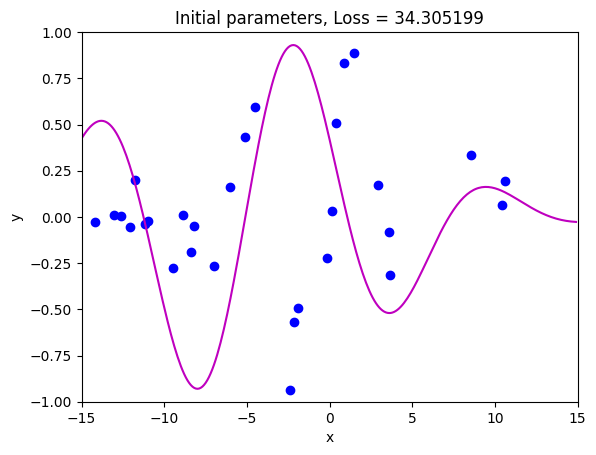

<ipython-input-20-d4c7319d748a>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))


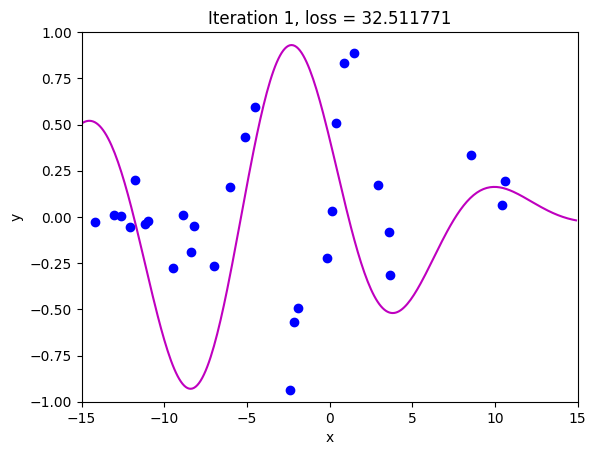

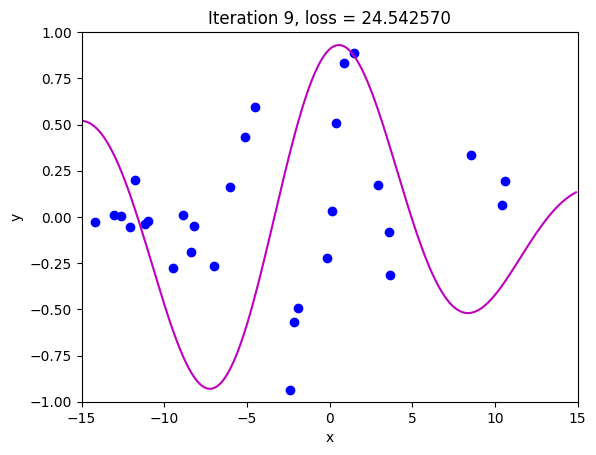

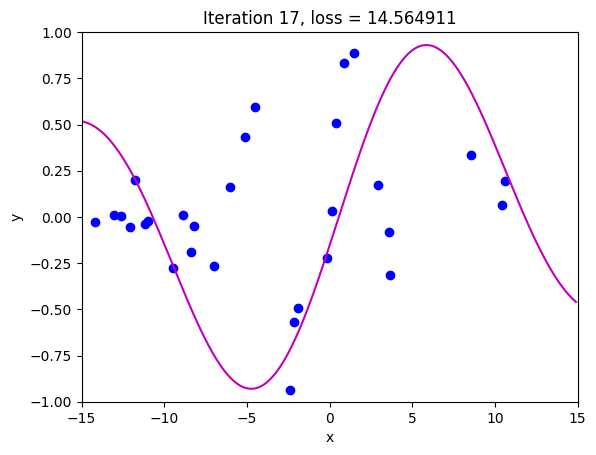

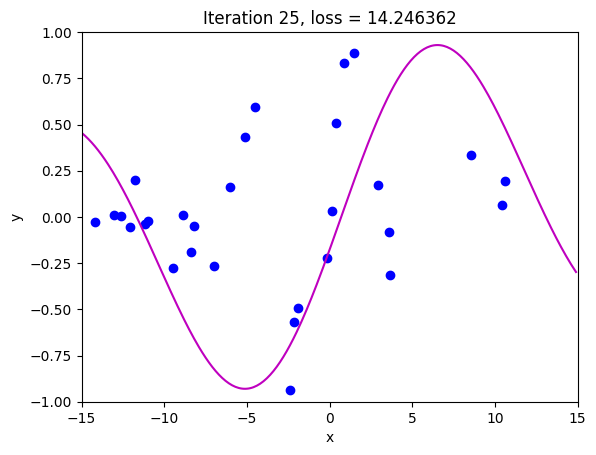

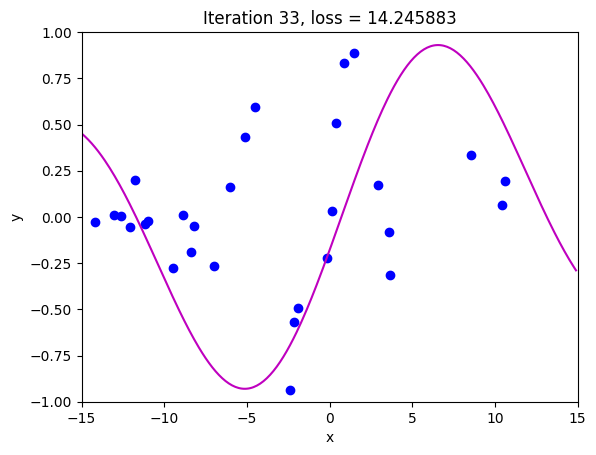

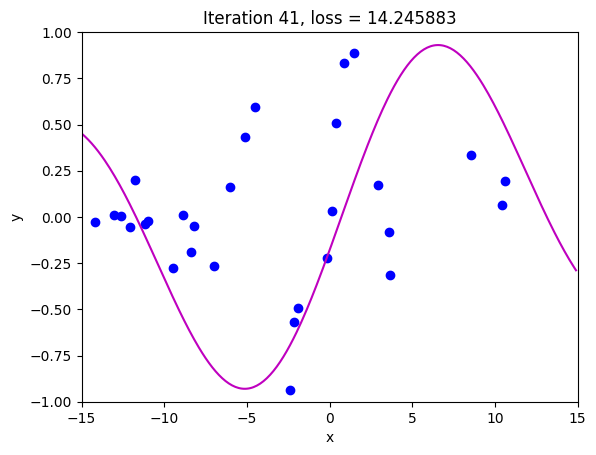

<ipython-input-17-0c24e4edaf22>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)


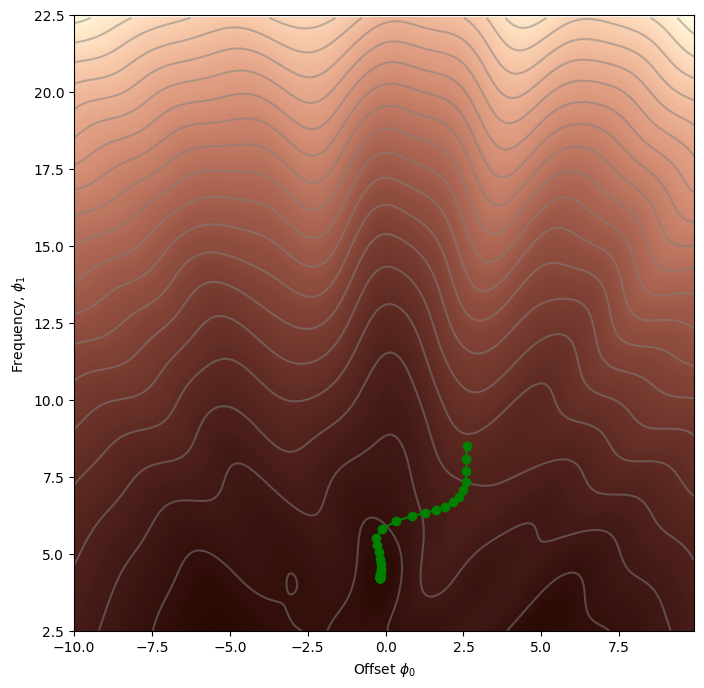

In [20]:
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 2.6
phi_all[1,0] = 8.5
lambda_ = 0.2

# Measure loss and draw initial model
loss =  compute_loss2(data[0,:], data[1,:], model, phi_all[:,0:1], lambda_)
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step2(phi_all[:,c_step:c_step+1],lambda_, data)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss2(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2], lambda_)
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function_reg(data, model, lambda_, my_colormap, phi_all)

You should see that the gradient descent algorithm now finds the correct minimum. By applying a tiny bit of domain knowledge (the parameter phi0 tends to be near zero and the parameter phi1 tends to be near 12.5), we get a better solution. However, the cost is that this solution is slightly biased towards this prior knowledge.

### Part 1.c) Low regularization
Let's experiment with different values of the regularization weight `lambda_`. In this experiment. Set `lambda_=0.01`. What happens when the regularization value is small. What happens when the regularization value is small. What happens to the final loss value when we add the regularization term? Does it go up?  Go down?  Stay the same? Record your observations.

A small regularization weight has a minimal impact on the model parameters and predictions. This small of a `lambda_` would probably not effectively improve the model's generalization.

<ipython-input-21-544bb770e396>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data, model, phi_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))


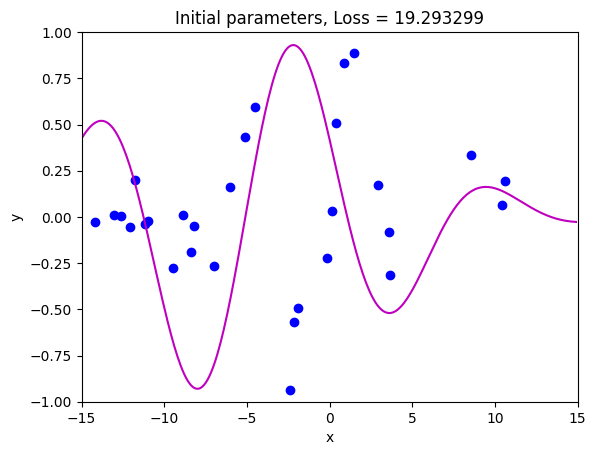

<ipython-input-21-544bb770e396>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data, model, phi_all[:, c_step + 1], "Iteration %d, loss = %f" % (c_step + 1, loss))


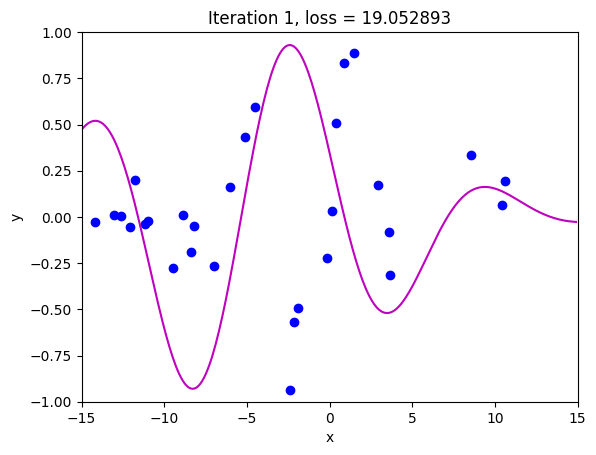

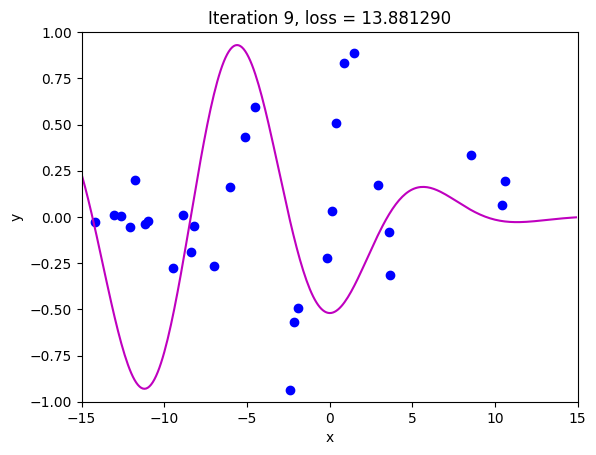

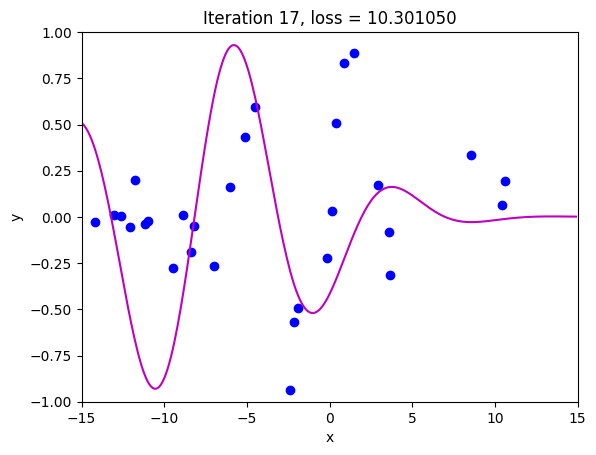

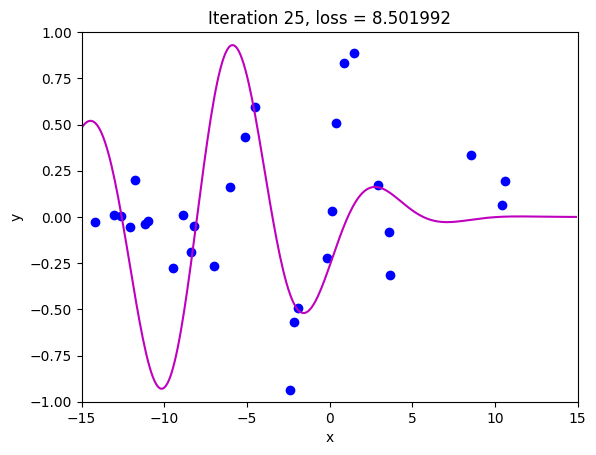

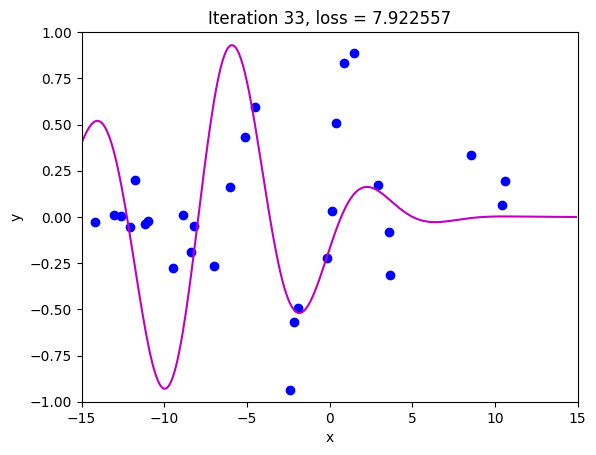

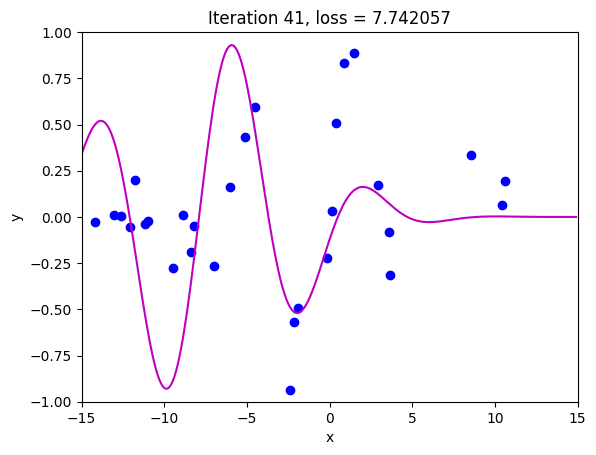

<ipython-input-17-0c24e4edaf22>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)


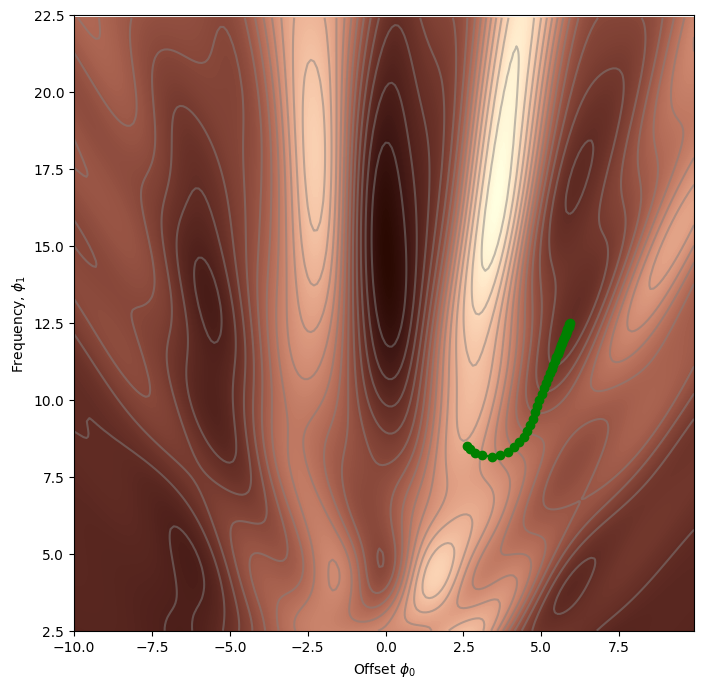

In [21]:
# Set the regularization parameter to a small value
lambda_ = 0.01

# Initialize the parameters
n_steps = 41
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = 2.6  # Initial phi_0
phi_all[1, 0] = 8.5  # Initial phi_1

# Measure loss and draw initial model
loss = compute_loss2(data[0, :], data[1, :], model, phi_all[:, 0:1], lambda_)
draw_model(data, model, phi_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))

# Perform gradient descent with the small regularization weight
for c_step in range(n_steps):
    # Gradient descent step
    phi_all[:, c_step + 1 : c_step + 2] = gradient_descent_step2(phi_all[:, c_step : c_step + 1], lambda_, data)
    # Measure loss and draw model every 8th step
    if c_step % 8 == 0:
        loss = compute_loss2(data[0, :], data[1, :], model, phi_all[:, c_step + 1 : c_step + 2], lambda_)
        draw_model(data, model, phi_all[:, c_step + 1], "Iteration %d, loss = %f" % (c_step + 1, loss))

# Visualize the optimization path
draw_loss_function_reg(data, model, lambda_, my_colormap, phi_all)

### Part 1.d) High regularization

Now set `lambda_=1.0`. What happens when the regularization value is large. What happens to the final loss value when we add the regularization term? Does it go up?  Go down?  Stay the same? Record your observations.

<ipython-input-22-2692c0ce97e8>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data, model, phi_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))


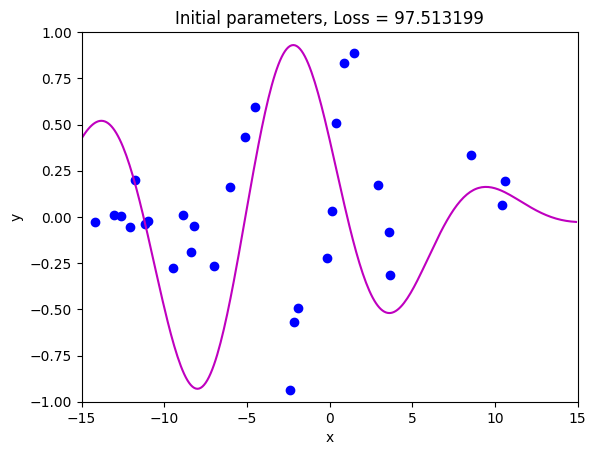

<ipython-input-22-2692c0ce97e8>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data, model, phi_all[:, c_step + 1], "Iteration %d, Loss = %f" % (c_step + 1, loss))


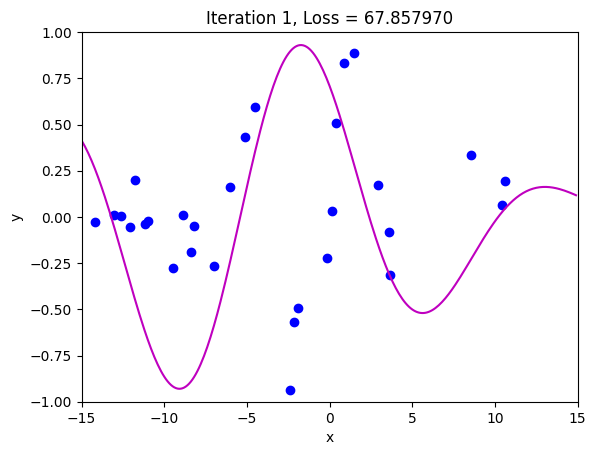

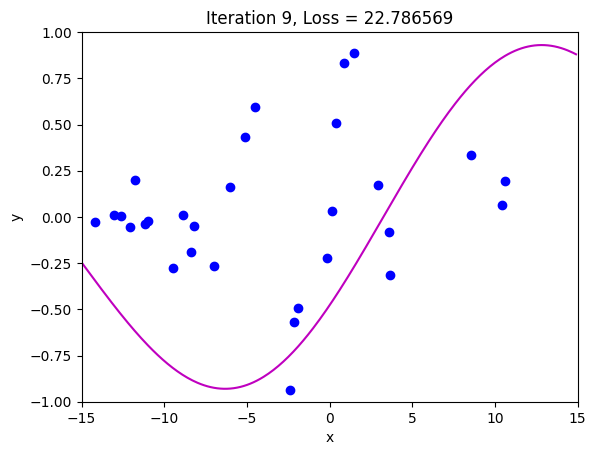

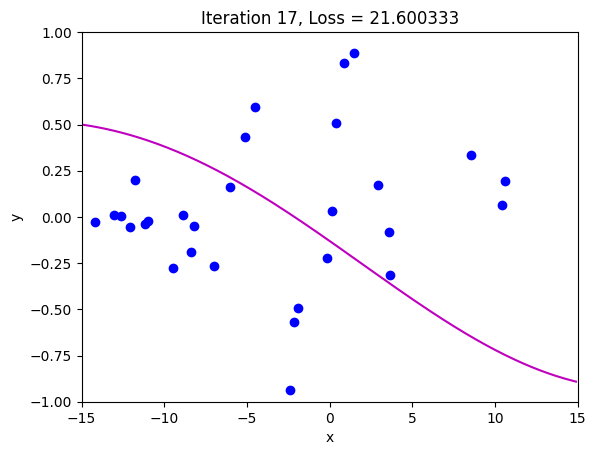

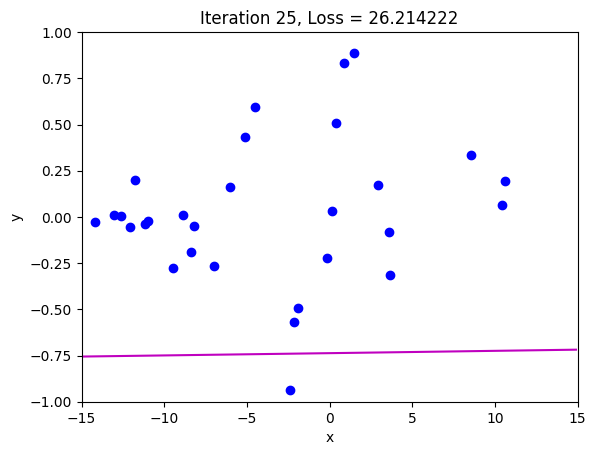

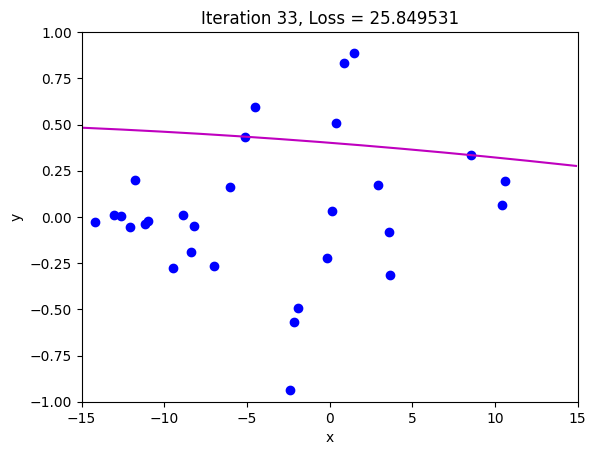

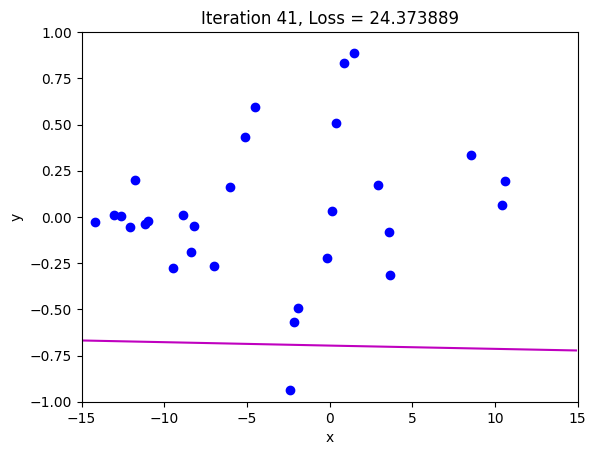

<ipython-input-17-0c24e4edaf22>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)


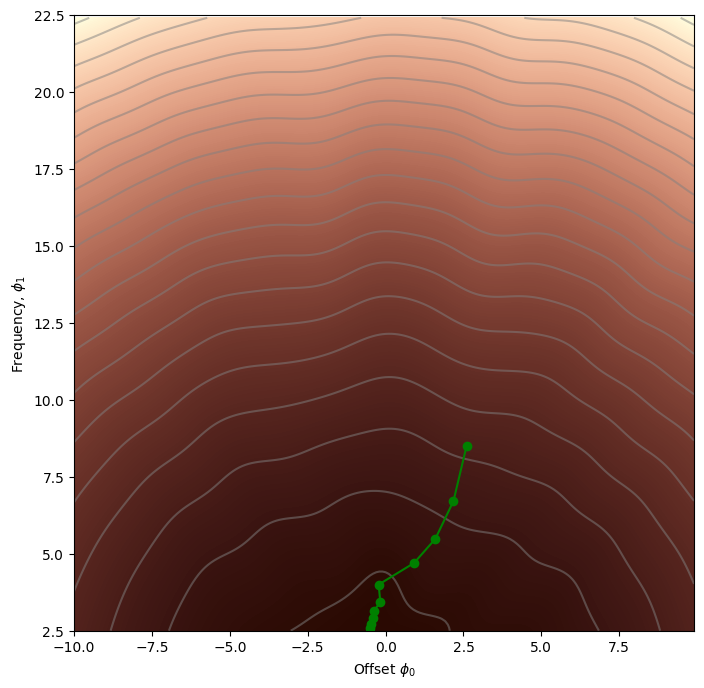

In [22]:
# Set the regularization parameter to a large value
lambda_ = 1.0

# Initialize the parameters
n_steps = 41
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = 2.6  # Initial phi_0
phi_all[1, 0] = 8.5  # Initial phi_1

# Measure loss and draw initial model
loss = compute_loss2(data[0, :], data[1, :], model, phi_all[:, 0:1], lambda_)
draw_model(data, model, phi_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))

# Perform gradient descent with the large regularization weight
for c_step in range(n_steps):
    # Do gradient descent step
    phi_all[:, c_step + 1 : c_step + 2] = gradient_descent_step2(phi_all[:, c_step : c_step + 1], lambda_, data)
    # Measure loss and draw model every 8th step
    if c_step % 8 == 0:
        loss = compute_loss2(data[0, :], data[1, :], model, phi_all[:, c_step + 1 : c_step + 2], lambda_)
        draw_model(data, model, phi_all[:, c_step + 1], "Iteration %d, Loss = %f" % (c_step + 1, loss))

# Visualize the optimization path
draw_loss_function_reg(data, model, lambda_, my_colormap, phi_all)

## Q2) Overfitting to MNIST

In this question, we will train a ConvNet on the MNIST dataset. The model will contain many more parameters than data points. We will investigate how to address the overfitting problem with L2 regularization (weight decay)

The MNISt dataset contains cropped images of handwritten digits from 0 to 9. Our task will be to classify the input image to the correct digit.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

You will want to make sure that you're connected to a GPU instance for this lab.

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
device

device(type='cuda')

Your device should be `device(type='cuda')`

Now let's specify our hyperparameters

In [26]:
# Hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 25

And setup our transforms. The following code will take an input image, cast it to a tensor and normalize it:

In [27]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

Let's download the MNIST dataset and create our dataloader object:

In [28]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Let's write some code to visualize one of the images from the training set

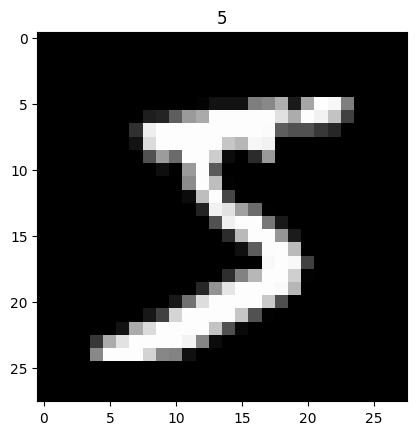

In [29]:
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('%i' % train_dataset.targets[0])
plt.show()

Now let's plot a bunch of digits together so you get an idea of what the training data looks like:

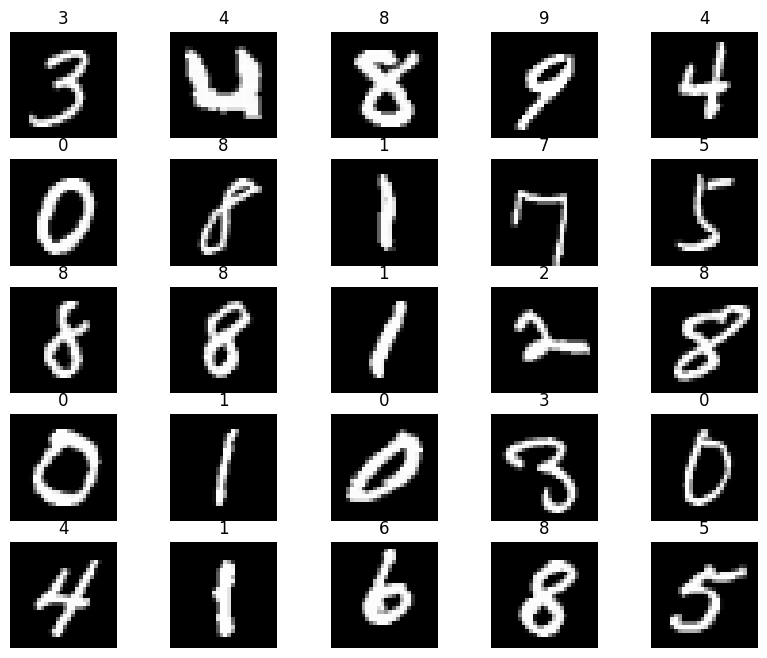

In [30]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Q2.a) Training a ConvNet on MNIST

**TODO**: Here we will specify our CNN model. You will need to create a model class, called `CNN`, which inherits from the `nn.Module` base class.

The CNN should have the following components:


*   A `Conv2D` layer with 1 input channel, 32 output channels, a kernel size of 2 a stride of 1, and a padding of 3 pixels
*   After the first `Conv2D` layer you should apply a `ReLU` acvtivation
*   Then apply `MaxPool2d` with a kernel size of 2
*   Next, you'll apply a second `Conv2D` layer with input channel of 32, output channel of 64, kernel size of 3, stride of 1, and padding of 2
*   Apply another `ReLU` activation
*   Introduce another `MaxPool2d` again with a kernel size of 2
*   Next, you will flatten the output of the maxpool layer into a tensor with dimensions `batch_size x (64 * 9 * 9)`, where 64 is the number of output channgel from the previous `Conv2D` layer and 9 is the remaining spatial dimensions after applying maxpooling.
*   Next, introduce a linear layer that maps from `(64 * 9 * 9)` to 1000
*   Finally, apply a final, linear layer that maps from `1000` hidden units to `10` the number of classes in the dataset
*   Note: we do not need to apply the softmax operation because the `nn.CrossEntropyLoss()` module requires unscaled logits for numerical stability. We will apply the argmax function in the test loop to evaluate accuracy.
*   If you have implemented your model correctly, you should have 5,213,666 total parameters













In [31]:
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First Conv2D layer with specified parameters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=2, stride=1, padding=3)
        # First MaxPool2D layer
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        # Second Conv2D layer with specified parameters
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2)
        # Second MaxPool2D layer
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        # First fully connected layer
        self.fc1 = nn.Linear(64 * 9 * 9, 1000)
        # Second fully connected layer (output layer)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        # Apply first convolutional layer
        x = self.conv1(x)
        # Apply ReLU activation
        x = F.relu(x)
        # Apply first max pooling layer
        x = self.pool1(x)
        # Apply second convolutional layer
        x = self.conv2(x)
        # Apply ReLU activation again
        x = F.relu(x)
        # Apply second max pooling layer
        x = self.pool2(x)
        # Flatten the output tensor
        x = x.view(-1, 64 * 9 * 9)
        # Apply first fully connected layer
        x = self.fc1(x)
        # Apply second fully connected layer (output layer)
        x = self.fc2(x)
        return x

Let's instantiate our model:

In [32]:
model = CNN().to(device)

And count the number of parameters:

In [33]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())
num_params = count_parameters(model)

We've implemented a test to make sure you've implemented your model correctly:

In [34]:
assert num_params == 5213666, f"Expected 5213666, got {num_params} parameters"

In [35]:
print(f'Total number of parameters: {num_params}')

Total number of parameters: 5213666


In [36]:
print(f"Number of training examples: {len(train_loader.dataset)}")

Number of training examples: 60000


**TODO**: Compute the ratio of parameters to data:

In [37]:
# Calculate the number of parameters in convolutional layers
conv_params = sum(p.numel() for p in model.conv1.parameters()) + sum(p.numel() for p in model.conv2.parameters())

# Calculate the ratio of convolutional parameters to total data parameters
ratio = conv_params / num_params

In [38]:
print("We have {:.2f}x more parameters than data points!".format(ratio))

We have 0.00x more parameters than data points!


**TODO**: Write 1-2 sentences explaining why this is difficult

This is difficult because the model's fully connected layers contain a vast majority of the parameters. This leads to a high risk of overfitting and computational complexity.

Let's instantiate our optimizer and loss function:

In [39]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Below is our training and test loop. Let's train our model to see what happens

In [40]:
# Train the model
total_step = len(train_loader)
trn_losses = []
test_losses = []
for epoch in range(num_epochs):
    print(f"Starting epoch: {epoch + 1}")
    epoch_loss = 0.0
    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    for i, (images, labels) in pbar:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        pbar.set_postfix({'loss': f'{loss.detach().item():.4f}', 'iteration': i+1})
    epoch_loss /= len(train_loader)
    trn_losses.append(epoch_loss)

    print("Starting test set loop")
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_test_loss = 0
        for images, labels in tqdm(test_loader, total=len(test_loader)):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss = criterion(outputs, labels)
            total_test_loss += test_loss.detach().item()
        total_test_loss /= len(test_loader)
        print(f"Test Loss: {total_test_loss:.4f}, Test: Accuracy: {(correct/total):.4f}")
        test_losses.append(total_test_loss)

Starting epoch: 1


100%|██████████| 469/469 [00:21<00:00, 21.47it/s, loss=0.0787, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 31.27it/s]


Test Loss: 0.0613, Test: Accuracy: 0.9797
Starting epoch: 2


100%|██████████| 469/469 [00:21<00:00, 22.13it/s, loss=0.0169, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.14it/s]


Test Loss: 0.0411, Test: Accuracy: 0.9850
Starting epoch: 3


100%|██████████| 469/469 [00:21<00:00, 22.08it/s, loss=0.0765, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 29.43it/s]


Test Loss: 0.0398, Test: Accuracy: 0.9860
Starting epoch: 4


100%|██████████| 469/469 [00:22<00:00, 20.83it/s, loss=0.0046, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 28.86it/s]


Test Loss: 0.0400, Test: Accuracy: 0.9870
Starting epoch: 5


100%|██████████| 469/469 [00:20<00:00, 22.69it/s, loss=0.0501, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 24.78it/s]


Test Loss: 0.0382, Test: Accuracy: 0.9875
Starting epoch: 6


100%|██████████| 469/469 [00:20<00:00, 22.59it/s, loss=0.0184, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 26.56it/s]


Test Loss: 0.0425, Test: Accuracy: 0.9869
Starting epoch: 7


100%|██████████| 469/469 [00:21<00:00, 21.87it/s, loss=0.0441, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 29.11it/s]


Test Loss: 0.0433, Test: Accuracy: 0.9876
Starting epoch: 8


100%|██████████| 469/469 [00:21<00:00, 22.10it/s, loss=0.0010, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 31.87it/s]


Test Loss: 0.0415, Test: Accuracy: 0.9883
Starting epoch: 9


100%|██████████| 469/469 [00:21<00:00, 21.91it/s, loss=0.0113, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 31.97it/s]


Test Loss: 0.0537, Test: Accuracy: 0.9850
Starting epoch: 10


100%|██████████| 469/469 [00:21<00:00, 22.15it/s, loss=0.0023, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.74it/s]


Test Loss: 0.0527, Test: Accuracy: 0.9874
Starting epoch: 11


100%|██████████| 469/469 [00:29<00:00, 15.92it/s, loss=0.0136, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:04<00:00, 16.22it/s]


Test Loss: 0.0467, Test: Accuracy: 0.9876
Starting epoch: 12


100%|██████████| 469/469 [00:21<00:00, 21.49it/s, loss=0.0405, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 26.79it/s]


Test Loss: 0.0509, Test: Accuracy: 0.9881
Starting epoch: 13


100%|██████████| 469/469 [00:20<00:00, 22.55it/s, loss=0.0005, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 24.05it/s]


Test Loss: 0.0716, Test: Accuracy: 0.9834
Starting epoch: 14


100%|██████████| 469/469 [00:21<00:00, 21.77it/s, loss=0.0109, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 25.16it/s]


Test Loss: 0.0457, Test: Accuracy: 0.9906
Starting epoch: 15


100%|██████████| 469/469 [00:20<00:00, 22.56it/s, loss=0.0046, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 25.26it/s]


Test Loss: 0.0514, Test: Accuracy: 0.9892
Starting epoch: 16


100%|██████████| 469/469 [00:21<00:00, 21.94it/s, loss=0.0010, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.49it/s]


Test Loss: 0.0530, Test: Accuracy: 0.9880
Starting epoch: 17


100%|██████████| 469/469 [00:21<00:00, 21.37it/s, loss=0.0216, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.13it/s]


Test Loss: 0.0587, Test: Accuracy: 0.9865
Starting epoch: 18


100%|██████████| 469/469 [00:21<00:00, 22.11it/s, loss=0.0045, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 31.61it/s]


Test Loss: 0.0670, Test: Accuracy: 0.9864
Starting epoch: 19


100%|██████████| 469/469 [00:21<00:00, 21.94it/s, loss=0.0522, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.66it/s]


Test Loss: 0.0610, Test: Accuracy: 0.9867
Starting epoch: 20


100%|██████████| 469/469 [00:21<00:00, 22.05it/s, loss=0.0000, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.82it/s]


Test Loss: 0.0699, Test: Accuracy: 0.9876
Starting epoch: 21


100%|██████████| 469/469 [00:21<00:00, 21.71it/s, loss=0.1126, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 26.68it/s]


Test Loss: 0.0660, Test: Accuracy: 0.9884
Starting epoch: 22


100%|██████████| 469/469 [00:21<00:00, 21.70it/s, loss=0.0078, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 30.80it/s]


Test Loss: 0.0680, Test: Accuracy: 0.9876
Starting epoch: 23


100%|██████████| 469/469 [00:20<00:00, 22.84it/s, loss=0.0084, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 25.25it/s]


Test Loss: 0.0690, Test: Accuracy: 0.9882
Starting epoch: 24


100%|██████████| 469/469 [00:20<00:00, 22.84it/s, loss=0.0002, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 27.43it/s]


Test Loss: 0.0555, Test: Accuracy: 0.9903
Starting epoch: 25


100%|██████████| 469/469 [00:20<00:00, 22.39it/s, loss=0.0028, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.54it/s]

Test Loss: 0.0721, Test: Accuracy: 0.9880


We are all done training. Let's visualize our train and test loss curves

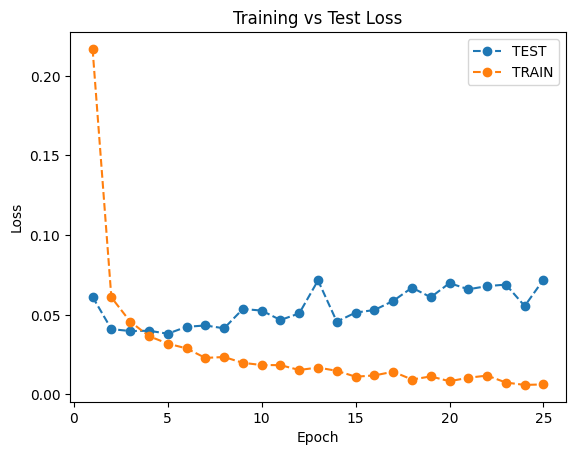

In [41]:
plt.plot(np.arange(1, num_epochs+1), test_losses, linestyle='--', marker='o', label='TEST')
plt.plot(np.arange(1, num_epochs+1), trn_losses, linestyle='--', marker='o', label='TRAIN')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Test Loss")
plt.legend()

plt.show()

**TODO:** What do you notice about the chart above? Is there a difference in the behavior of the train and test curves? If so, what is the difference and why do you think this is occuring?

The model is learning effectively from the training data, as seen by the above chart, where the training loss (orange) steadily drops across the epochs. But after roughly five epochs, the test loss (blue) starts to fluctuate and even rise after initially declining. This implies that as training goes on, the model starts to overfit, which results in worse generalization on the test data even while it is fitting the training data more accurately over time. Overfitting is indicated when the training and test loss curves diverge after a few epochs. Regularization strategies like weight decay, dropout, or early halting may be able to lessen this problem and enhance the model's ability to generalize to new data.

### Q2.b) Weight Decay

Now we apply L2 regularization (often called weight decay) to our training algorithm. Fortunately, this is quite easy with the `Adam` optimizer class in PyTorch.


**TODO**: Create a variable called `weight_decay` and set it to 0.001. Pass this into the `Adam` constructor and retrain your model

In [42]:
# Hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 25
weight_decay = 0.001

In [43]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()

**TODO**: Instantiate your optimizer object with weight decay. See the docs if you have any question: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html

In [44]:
# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

**TODO**: train your model with the same setup as before. However, this time create a new list of epoch-wise loss values for the train and the test loop. In other words, rename `trn_losses` --> `wd_train_losses` and test_losses --> `wd_test_losses`

In [45]:
# Train the model
total_step = len(train_loader)
wd_train_losses = []
wd_test_losses = []

for epoch in range(num_epochs):
    print(f"Starting epoch: {epoch + 1}")
    epoch_loss = 0.0
    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    for i, (images, labels) in pbar:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        pbar.set_postfix({'loss': f'{loss.detach().item():.4f}', 'iteration': i+1})
    epoch_loss /= len(train_loader)
    wd_train_losses.append(epoch_loss)

    print("Starting test set loop")
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_test_loss = 0
        for images, labels in tqdm(test_loader, total=len(test_loader)):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss = criterion(outputs, labels)
            total_test_loss += test_loss.detach().item()
        total_test_loss /= len(test_loader)
        print(f"Test Loss: {total_test_loss:.4f}, Test Accuracy: {(correct/total):.4f}")
        wd_test_losses.append(total_test_loss)
    model.train()

Starting epoch: 1


100%|██████████| 469/469 [00:21<00:00, 22.20it/s, loss=0.0651, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.01it/s]


Test Loss: 0.0403, Test Accuracy: 0.9881
Starting epoch: 2


100%|██████████| 469/469 [00:21<00:00, 22.02it/s, loss=0.0428, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 31.59it/s]


Test Loss: 0.0387, Test Accuracy: 0.9872
Starting epoch: 3


100%|██████████| 469/469 [00:21<00:00, 21.97it/s, loss=0.0242, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.55it/s]


Test Loss: 0.0358, Test Accuracy: 0.9891
Starting epoch: 4


100%|██████████| 469/469 [00:21<00:00, 21.57it/s, loss=0.0246, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.96it/s]


Test Loss: 0.0457, Test Accuracy: 0.9857
Starting epoch: 5


100%|██████████| 469/469 [00:21<00:00, 22.19it/s, loss=0.0615, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.03it/s]


Test Loss: 0.0388, Test Accuracy: 0.9867
Starting epoch: 6


100%|██████████| 469/469 [00:20<00:00, 22.43it/s, loss=0.0361, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 28.99it/s]


Test Loss: 0.0359, Test Accuracy: 0.9896
Starting epoch: 7


100%|██████████| 469/469 [00:20<00:00, 22.78it/s, loss=0.0623, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 25.24it/s]


Test Loss: 0.0330, Test Accuracy: 0.9889
Starting epoch: 8


100%|██████████| 469/469 [00:20<00:00, 22.82it/s, loss=0.0340, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 28.47it/s]


Test Loss: 0.0399, Test Accuracy: 0.9876
Starting epoch: 9


100%|██████████| 469/469 [00:20<00:00, 22.42it/s, loss=0.0333, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 31.55it/s]


Test Loss: 0.0420, Test Accuracy: 0.9865
Starting epoch: 10


100%|██████████| 469/469 [00:21<00:00, 22.18it/s, loss=0.0645, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.96it/s]


Test Loss: 0.0358, Test Accuracy: 0.9886
Starting epoch: 11


100%|██████████| 469/469 [00:22<00:00, 21.25it/s, loss=0.0458, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.50it/s]


Test Loss: 0.0366, Test Accuracy: 0.9893
Starting epoch: 12


100%|██████████| 469/469 [00:21<00:00, 22.20it/s, loss=0.0809, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.04it/s]


Test Loss: 0.0345, Test Accuracy: 0.9887
Starting epoch: 13


100%|██████████| 469/469 [00:24<00:00, 18.91it/s, loss=0.0056, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.60it/s]


Test Loss: 0.0302, Test Accuracy: 0.9905
Starting epoch: 14


100%|██████████| 469/469 [00:21<00:00, 22.15it/s, loss=0.0377, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.32it/s]


Test Loss: 0.0335, Test Accuracy: 0.9903
Starting epoch: 15


100%|██████████| 469/469 [00:21<00:00, 21.97it/s, loss=0.0076, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.15it/s]


Test Loss: 0.0319, Test Accuracy: 0.9900
Starting epoch: 16


100%|██████████| 469/469 [00:21<00:00, 22.24it/s, loss=0.0646, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 29.55it/s]


Test Loss: 0.0324, Test Accuracy: 0.9894
Starting epoch: 17


100%|██████████| 469/469 [00:20<00:00, 23.12it/s, loss=0.0079, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 25.03it/s]


Test Loss: 0.0333, Test Accuracy: 0.9891
Starting epoch: 18


100%|██████████| 469/469 [00:21<00:00, 22.04it/s, loss=0.0412, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 26.10it/s]


Test Loss: 0.0337, Test Accuracy: 0.9900
Starting epoch: 19


100%|██████████| 469/469 [00:22<00:00, 21.12it/s, loss=0.0127, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 25.63it/s]


Test Loss: 0.0375, Test Accuracy: 0.9878
Starting epoch: 20


100%|██████████| 469/469 [00:20<00:00, 22.72it/s, loss=0.0313, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 30.36it/s]


Test Loss: 0.0309, Test Accuracy: 0.9895
Starting epoch: 21


100%|██████████| 469/469 [00:20<00:00, 22.41it/s, loss=0.1683, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.38it/s]


Test Loss: 0.0297, Test Accuracy: 0.9905
Starting epoch: 22


100%|██████████| 469/469 [00:20<00:00, 22.52it/s, loss=0.0543, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 32.92it/s]


Test Loss: 0.0301, Test Accuracy: 0.9900
Starting epoch: 23


100%|██████████| 469/469 [00:20<00:00, 22.53it/s, loss=0.0273, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.11it/s]


Test Loss: 0.0325, Test Accuracy: 0.9889
Starting epoch: 24


100%|██████████| 469/469 [00:20<00:00, 22.57it/s, loss=0.0634, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:02<00:00, 33.22it/s]


Test Loss: 0.0326, Test Accuracy: 0.9900
Starting epoch: 25


100%|██████████| 469/469 [00:20<00:00, 22.67it/s, loss=0.0433, iteration=469]


Starting test set loop


100%|██████████| 79/79 [00:03<00:00, 23.04it/s]

Test Loss: 0.0317, Test Accuracy: 0.9890


Now let's plot the epoch-wise losses from our baseline experiment (with no weight decay) and the epoch-wise losses from our training run with weight decay:

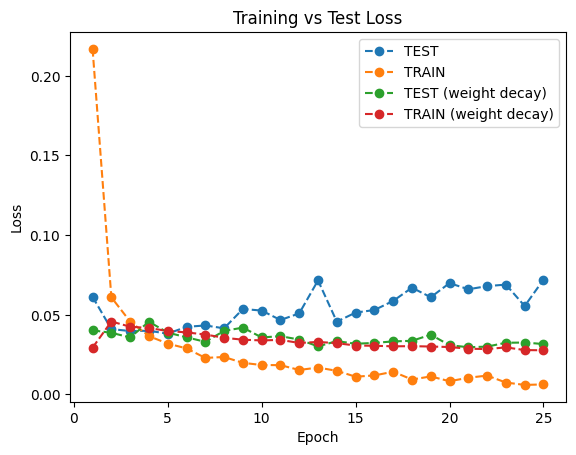

In [47]:
plt.plot(np.arange(1, num_epochs+1), test_losses, linestyle='--', marker='o', label='TEST')
plt.plot(np.arange(1, num_epochs+1), trn_losses, linestyle='--', marker='o', label='TRAIN')

plt.plot(np.arange(1, num_epochs+1), wd_test_losses, linestyle='--', marker='o', label='TEST (weight decay)')
plt.plot(np.arange(1, num_epochs+1), wd_train_losses, linestyle='--', marker='o', label='TRAIN (weight decay)')



plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Test Loss")
plt.legend()

plt.show()

**TODO**: Discuss your observations about 1) the behavior of the train loss in the baseline run vs the train loss in the weight decay run and 2) the behavior of the test loss in the baseline run vs the test loss of the weight decay run. Discuss whether or not you think applying weight decay was successful.

The model is kept from overfitting as aggressively as in the baseline instance, as seen by the training loss with weight decay (red) stabilizing and staying marginally higher than the baseline training loss (orange) in the chart. Weight decay serves as a regularizer, penalizing excessive weights and maintaining the model's simplicity, therefore this is to be expected.

Comparing the test loss with weight decay (green) to the baseline test loss (blue), a notable improvement is evident. Better generalization is indicated by the fact that it stays lower and more consistent over epochs, lacking the pronounced oscillations observed in the baseline test loss.

Overall, weight decay has improved test performance while maintaining a somewhat higher training loss, which has helped to avoid overfitting. The weight decay model exhibits more robust generalization, confirming that weight decay is a useful technique in this situation.Overall, weight decay has improved test performance while maintaining a somewhat higher training loss, which has helped to avoid overfitting. The weight decay model exhibits more robust generalization, confirming that weight decay is a useful technique in this situation.